# Data Cleaning
##### All Datasets Used:
<ol>
<li>price-range-of-hdb-flats-offered.csv</li>
<li>bookings-for-new-flats.csv</li>
<li>flats-constructed-by-housing-and-development-board-annual.csv</li>
<li>estimated-resident-population-in-hdb-flats-by-town.csv</li>
<li>hdb-property-information.csv</li>
<li>housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv</li>
</ol>

##### Combined Dataset:

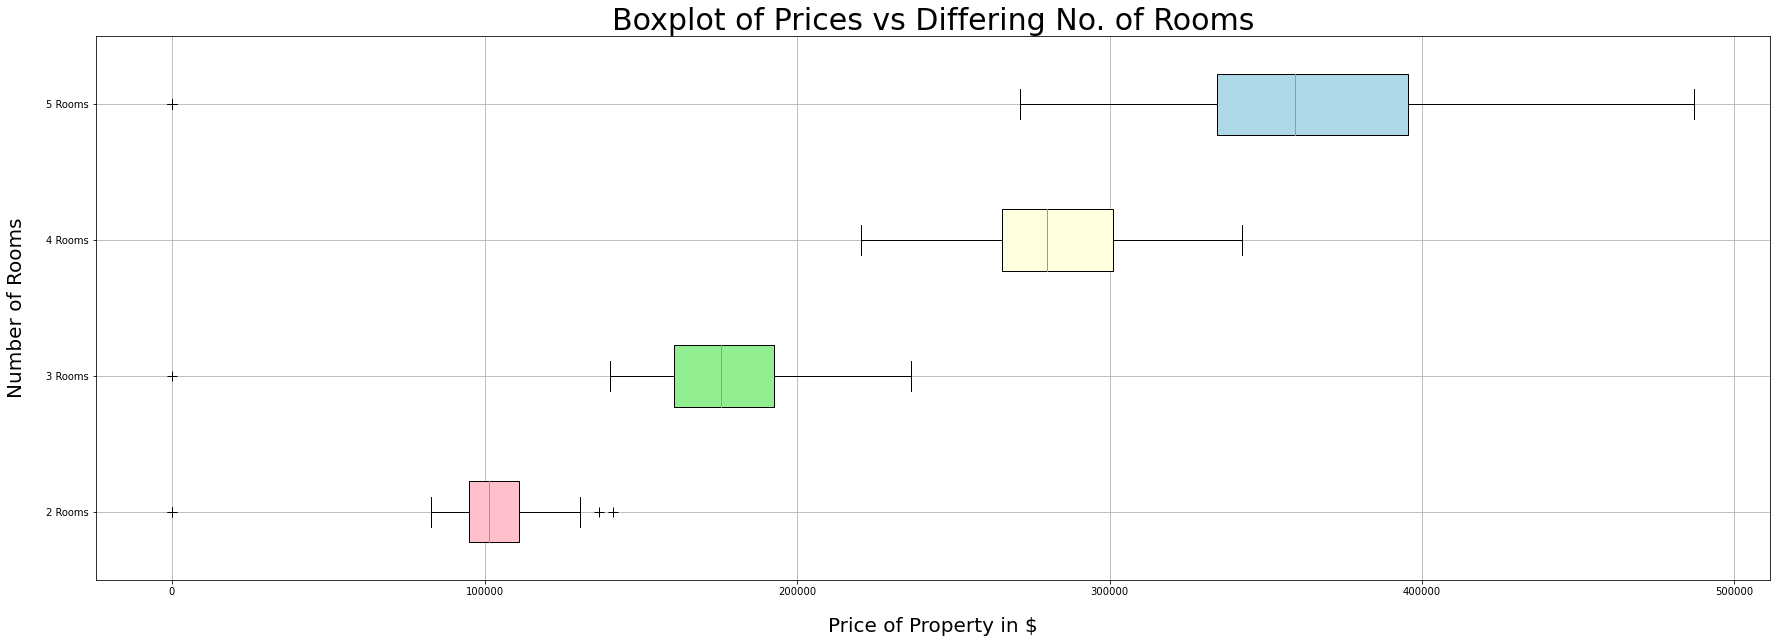

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.widgets import Button, RadioButtons, CheckButtons, Cursor


raw_data = np.genfromtxt('./Datasets/(1) Price Range of HDB Flats Offered/price-range-of-hdb-flats-offered.csv',delimiter=',', names=True,dtype=[('financial_year','i8'),('town','U20'),('room_type','U8'),('min_selling_price','i8'),('max_selling_price','i8')])


financial_year = []
town = []
room_type = []
min_selling_price =[]
max_selling_price =[]


for row in raw_data:
    financial_year.append(row[0])
    town.append(row[1])
    room_type.append(row[2])
    min_selling_price.append(row[3])
    max_selling_price.append(row[4])


mean_selling_price = np.mean(np.array([min_selling_price,max_selling_price]),axis=0)


cleaned_data = {
    'financial_year':np.array(financial_year),
    'town':np.array(town),
    'room_type':np.array(room_type),
    'min_selling_price':np.array(min_selling_price),
    'max_selling_price':np.array(max_selling_price),
    'mean_selling_price':np.array(mean_selling_price)
}
labels = ['2 Rooms','3 Rooms','4 Rooms','5 Rooms']

two_room_price = []
three_room_price = []
four_room_price = []
five_room_price = []

for i in range(len(cleaned_data['room_type'])):
    if room_type[i] == '2-room':
        two_room_price.append(mean_selling_price[i])
    elif room_type[i] == '3-room':
        three_room_price.append(mean_selling_price[i])
    elif room_type[i] =='4-room':
        four_room_price.append(mean_selling_price[i])
    else:
        five_room_price.append(mean_selling_price[i])

plt.rcParams['figure.figsize'] = [30, 10]
boxplot_data = np.array([two_room_price,three_room_price,four_room_price,five_room_price],dtype=object)
fig = plt.figure()
ax1 = fig.add_subplot(111)

room_box = ax1.boxplot(boxplot_data,labels=labels,vert=False,
                     patch_artist=True,flierprops=dict(marker='+', markerfacecolor='red', markersize=10,linestyle='none'))
plt.xlabel('Price of Property in $', color='black', fontsize='20',
           labelpad=20)
plt.ylabel('Number of Rooms',color='black',fontsize='20',labelpad=20)
plt.tick_params(axis='x', colors='black',)
plt.tick_params(axis='y', colors='black')
plt.title('Boxplot of Prices vs Differing No. of Rooms', color='black',fontsize='30')
room_box['boxes'][0].set_facecolor('pink')
room_box['boxes'][1].set_facecolor('lightgreen')
room_box['boxes'][2].set_facecolor('lightyellow')
room_box['boxes'][3].set_facecolor('lightblue')
# Defining the cursor
cursor = Cursor(ax1, horizOn=True, vertOn=True, useblit=True,
                color='red', linewidth=1,alpha=0.5)
# Creating an annotating box
annot = ax1.annotate("", xy=(0, 0), xytext=(-40, 40),
                    textcoords="offset points",
                    bbox=dict(boxstyle='round4', fc='linen', ec='k', lw=1),
                    arrowprops=dict(arrowstyle='-|>'))
annot.set_visible(False)
# Function for storing and showing the clicked values
coord = []


def onclick(event):
    global coord
    coord.append((event.xdata, event.ydata))
    x = event.xdata
    y = event.ydata

    # printing the values of the selected point
    annot.xy = (x, y)
    text = f"${x:.2f}"
    annot.set_text(text)
    annot.set_visible(True)
    fig.canvas.draw()  # redraw the figure


fig.canvas.mpl_connect('button_press_event', onclick)
plt.grid(True)
plt.show()

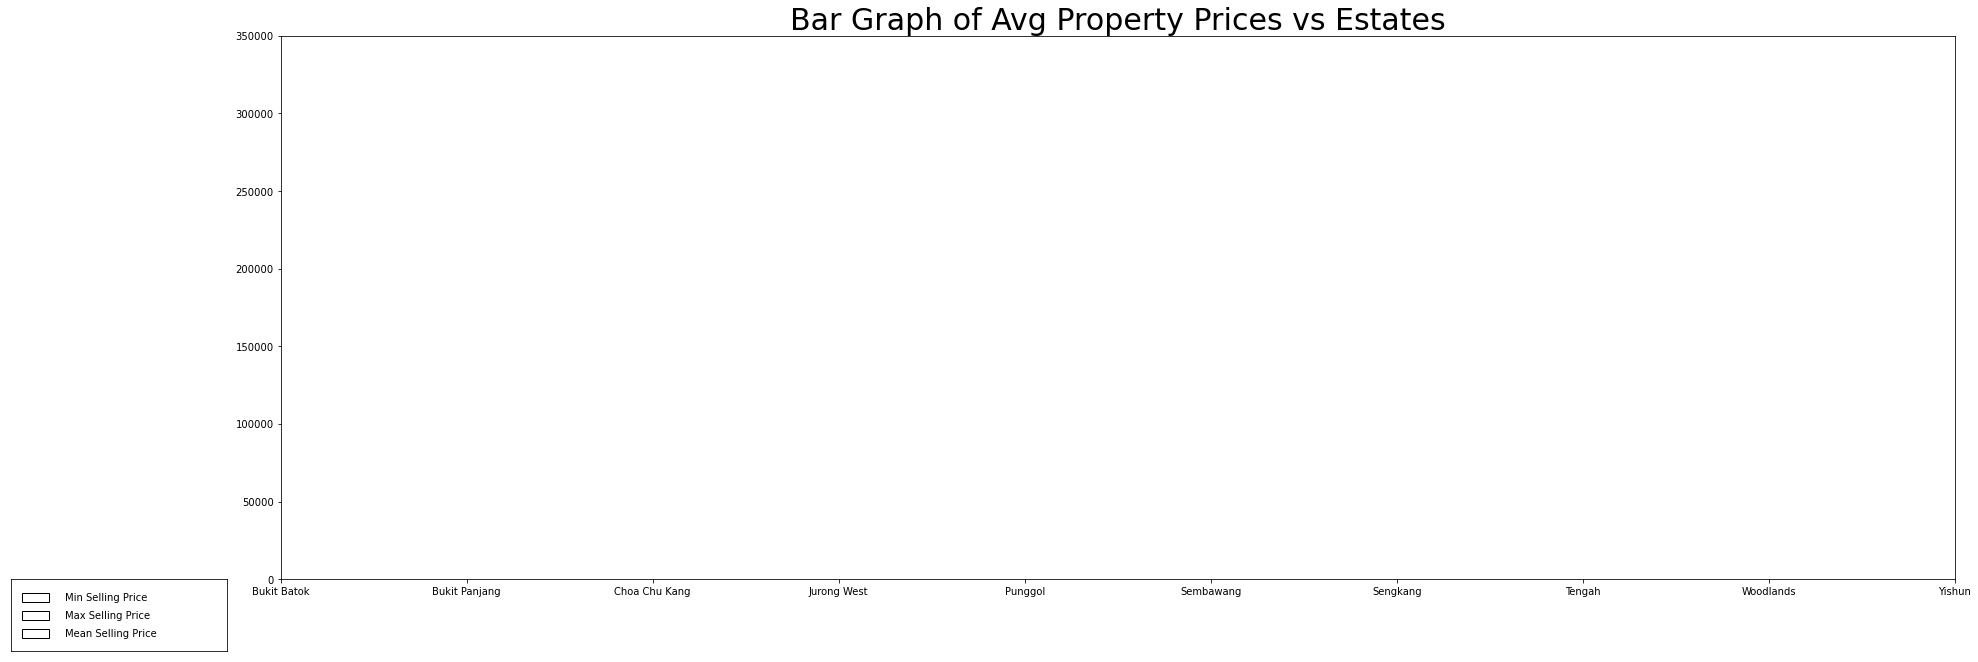

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.widgets import Button, RadioButtons, CheckButtons, Cursor


raw_data = np.genfromtxt(
    './Datasets/(1) Price Range of HDB Flats Offered/price-range-of-hdb-flats-offered.csv',
    delimiter=',', names=True,
    dtype=[('financial_year', 'i8'), ('town', 'U20'), ('room_type', 'U8'),
           ('min_selling_price', 'i8'), ('max_selling_price', 'i8')])

financial_year = []
town = []
room_type = []
min_selling_price = []
max_selling_price = []

for row in raw_data:
    financial_year.append(row[0])
    town.append(row[1])
    room_type.append(row[2])
    min_selling_price.append(row[3])
    max_selling_price.append(row[4])

mean_selling_price = np.mean(np.array([min_selling_price, max_selling_price]),
                             axis=0)

cleaned_data = {
    'financial_year': np.array(financial_year),
    'town': np.array(town),
    'room_type': np.array(room_type),
    'min_selling_price': np.array(min_selling_price),
    'max_selling_price': np.array(max_selling_price),
    'mean_selling_price': np.array(mean_selling_price)
}
label = np.unique(cleaned_data['town'])
town_dict_1 = dict.fromkeys(label, 0)
temp_price = []
for key, value in town_dict_1.items():
    for i in range(len(town)):
        if town[i] == key:
            temp_price.append(min_selling_price[i])
    town_dict_1[key] = temp_price
    temp_price = []
for key, value in town_dict_1.items():
    town_dict_1[key] = round(np.average(np.array(value)), 2)

label = np.unique(cleaned_data['town'])
town_dict_2 = dict.fromkeys(label, 0)
temp_price = []
for key, value in town_dict_2.items():
    for i in range(len(town)):
        if town[i] == key:
            temp_price.append(max_selling_price[i])
    town_dict_2[key] = temp_price
    temp_price = []
for key, value in town_dict_2.items():
    town_dict_2[key] = round(np.average(np.array(value)), 2)

label = np.unique(cleaned_data['town'])
town_dict_3 = dict.fromkeys(label, 0)
temp_price = []
for key, value in town_dict_3.items():
    for i in range(len(town)):
        if town[i] == key:
            temp_price.append(mean_selling_price[i])
    town_dict_3[key] = temp_price
    temp_price = []
for key, value in town_dict_3.items():
    town_dict_3[key] = round(np.average(np.array(value)), 2)


fig = plt.figure()
ax1 = fig.add_subplot(111)

labels = list(town_dict_1.keys())
pos = np.arange(len(labels))
bar_width = 0.25

plt.xticks(pos, labels)
plt.rcParams['figure.figsize'] = [30, 10]
plt.tick_params(axis='x', colors='black', )
plt.tick_params(axis='y', colors='black')
plt.yticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000])
plt.title('Bar Graph of Avg Property Prices vs Estates', color='black',
          fontsize='30')
rax = plt.axes([0, 0.025, 0.1, 0.1])
labels = ['Min Selling Price', 'Max Selling Price', 'Mean Selling Price']
visibility = [False, False, False]
plot_button = CheckButtons(rax, labels, visibility)


# function for displaying/hiding the plots
def select_plot(label):
    # get the index that corresponds to the word "label"
    index = labels.index(label)

    # set the plot to visible
    if index == 0:
        ax1.bar(pos - bar_width, list(town_dict_1.values()), bar_width,
                align='center', color='skyblue')
        fig.canvas.draw()
    elif index == 1:
        plt.yticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000])
        ax1.bar(pos, list(town_dict_2.values()), bar_width,
                align='center',
                color='lightcoral')
        fig.canvas.draw()
    elif index == 2:
        plt.yticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000])
        ax1.bar(pos + bar_width, list(town_dict_3.values()), bar_width,
                align='center')
        fig.canvas.draw()


plot_button.on_clicked(select_plot)
# Defining the cursor
cursor = Cursor(ax1, horizOn=True, vertOn=True, useblit=True,
                color='red', linewidth=1,alpha=0.5)
# Creating an annotating box
annot = ax1.annotate("", xy=(0, 0), xytext=(-40, 40),
                    textcoords="offset points",
                    bbox=dict(boxstyle='round4', fc='linen', ec='k', lw=1),
                    arrowprops=dict(arrowstyle='-|>'))
annot.set_visible(False)
# Function for storing and showing the clicked values
coord = []


def onclick(event):
    global coord
    coord.append((event.xdata, event.ydata))
    x = event.xdata
    y = event.ydata

    # printing the values of the selected point
    annot.xy = (x, y)
    text = f"${y:.2f}"
    annot.set_text(text)
    annot.set_visible(True)
    fig.canvas.draw()  # redraw the figure


fig.canvas.mpl_connect('button_press_event', onclick)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

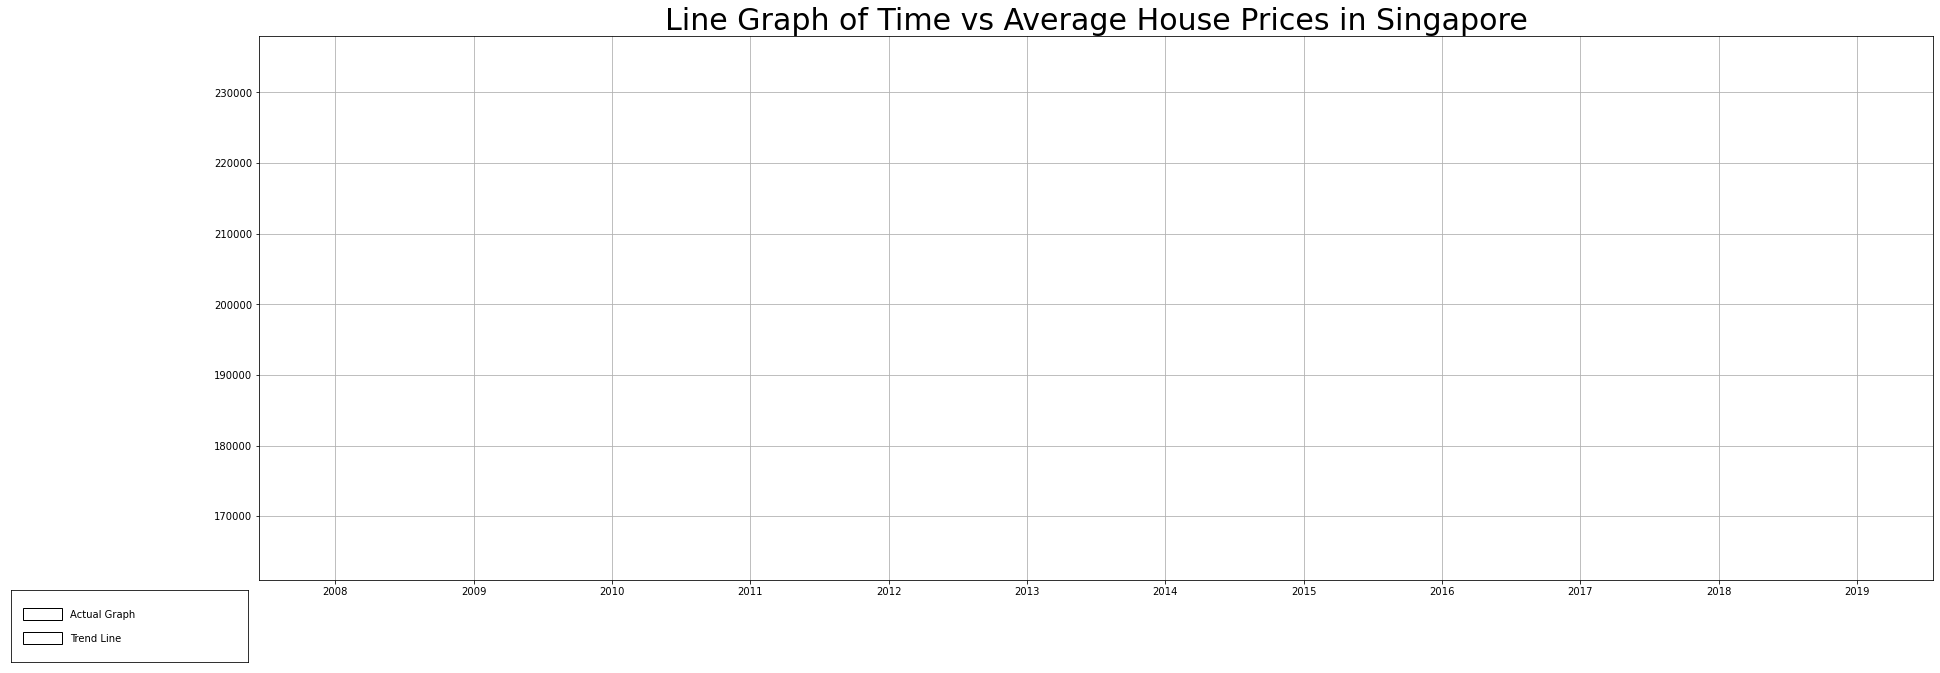

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.widgets import Button, RadioButtons, CheckButtons, Cursor


raw_data = np.genfromtxt(
    './Datasets/(1) Price Range of HDB Flats Offered/price-range-of-hdb-flats-offered.csv',
    delimiter=',', names=True,
    dtype=[('financial_year', 'i8'), ('town', 'U20'), ('room_type', 'U8'),
           ('min_selling_price', 'i8'), ('max_selling_price', 'i8')])

financial_year = []
town = []
room_type = []
min_selling_price = []
max_selling_price = []

for row in raw_data:
    financial_year.append(row[0])
    town.append(row[1])
    room_type.append(row[2])
    min_selling_price.append(row[3])
    max_selling_price.append(row[4])

mean_selling_price = np.mean(np.array([min_selling_price, max_selling_price]),
                             axis=0)

cleaned_data = {
    'financial_year': np.array(financial_year),
    'town': np.array(town),
    'room_type': np.array(room_type),
    'min_selling_price': np.array(min_selling_price),
    'max_selling_price': np.array(max_selling_price),
    'mean_selling_price': np.array(mean_selling_price)
}
unique_year = np.unique(cleaned_data['financial_year'])
cumulative_price = dict.fromkeys(unique_year, 0)
temp_price = []
for key in cumulative_price.keys():
    for i in range(len(min_selling_price)):
        if cleaned_data['financial_year'][i] == key:
            temp_price.append(min_selling_price[i])
    cumulative_price[key] = round((sum(temp_price) / len(temp_price)), 2)
    temp_price = []

X = unique_year
Y = 3540 * X - 6.928e+006

fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(unique_year, cumulative_price.values(), '-o', label='actual '
                                                                      'graph',visible=False)
line2, = ax1.plot(X, Y, 'o--', label='trend graph',visible=False)
plt.rcParams['figure.figsize'] = [30, 10]
plt.tick_params(axis='x', colors='black', )
plt.tick_params(axis='y', colors='black')
ax1.set_xticks(unique_year)
plt.grid(True)
plt.title('Line Graph of Time vs Average House Prices in Singapore',
          color='black', fontsize='30')
# Defining the cursor
cursor = Cursor(ax1, horizOn=True, vertOn=True, useblit=True,
                color='red', linewidth=1, alpha=0.5)
# Creating an annotating box
annot = ax1.annotate("", xy=(0, 0), xytext=(-40, 40),
                     textcoords="offset points",
                     bbox=dict(boxstyle='round4', fc='linen', ec='k', lw=1),
                     arrowprops=dict(arrowstyle='-|>'))
annot.set_visible(False)
# Function for storing and showing the clicked values
coord = []


def onclick(event):
    global coord
    coord.append((event.xdata, event.ydata))
    x = event.xdata
    y = event.ydata

    # printing the values of the selected point
    annot.xy = (x, y)
    text = f"{y:.2f}"
    annot.set_text(text)
    annot.set_visible(True)
    fig.canvas.draw()  # redraw the figure


fig.canvas.mpl_connect('button_press_event', onclick)

labels = ['Actual Graph', 'Trend Line']
ax_check = plt.axes([0.01, 0.01, 0.11, 0.1])
plots = [line1, line2]
activated = [(line.get_visible()) for line in plots]
plot_button = CheckButtons(ax_check, labels, activated)


# function for displaying/hiding the plots
def select_plot(label):
    # get the index that corresponds to the word "label"
    index = labels.index(label)

    # set the plot to visible
    plots[index].set_visible(not plots[index].get_visible())
    fig.canvas.draw()


plot_button.on_clicked(select_plot)
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

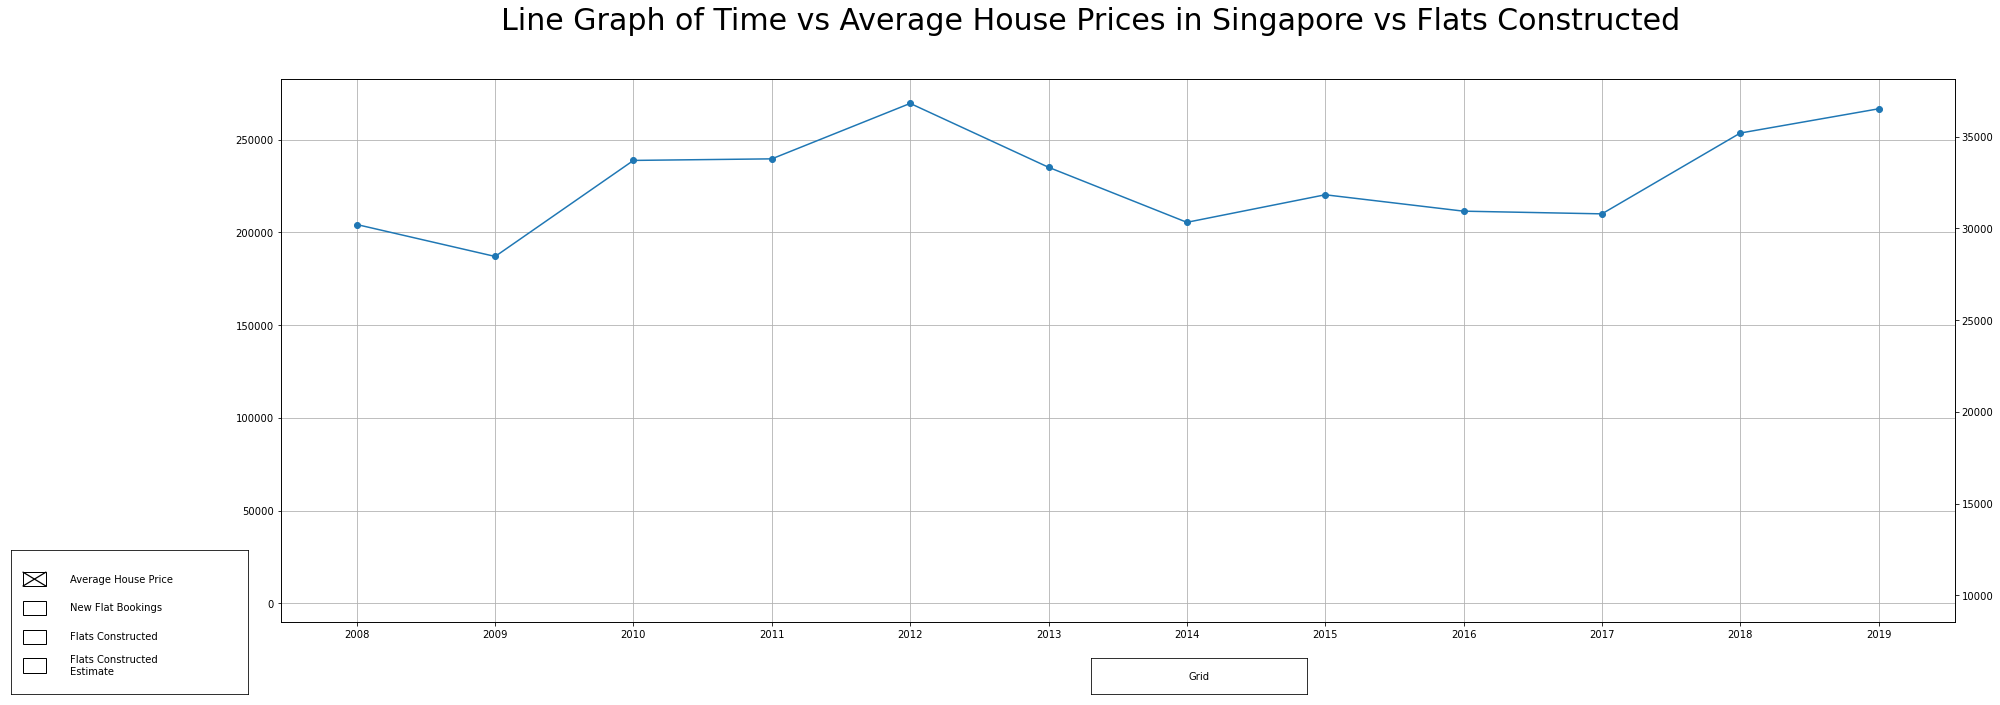

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.widgets import Button, CheckButtons


raw_data = np.genfromtxt(
    './Datasets/(1) Price Range of HDB Flats Offered/price-range-of-hdb-flats-offered.csv',
    delimiter=',', names=True,
    dtype=[('financial_year', 'i8'), ('town', 'U20'), ('room_type', 'U8'),
           ('min_selling_price', 'i8'), ('max_selling_price', 'i8')])

financial_year = []
town = []
room_type = []
min_selling_price = []
max_selling_price = []

for row in raw_data:
    financial_year.append(row[0])
    town.append(row[1])
    room_type.append(row[2])
    min_selling_price.append(row[3])
    max_selling_price.append(row[4])

mean_selling_price = np.mean(np.array([min_selling_price, max_selling_price]),
                             axis=0)

cleaned_data = {
    'financial_year': np.array(financial_year),
    'town': np.array(town),
    'room_type': np.array(room_type),
    'min_selling_price': np.array(min_selling_price),
    'max_selling_price': np.array(max_selling_price),
    'mean_selling_price': np.array(mean_selling_price)
}

raw_data_1 = np.genfromtxt(
    './Datasets/(1) Price Range of HDB Flats Offered/price-range-of-hdb-flats-offered.csv',
    delimiter=',', names=True,
    dtype=[('financial_year', 'i8'), ('town', 'U20'), ('room_type', 'U8'),
           ('min_selling_price', 'i8'), ('max_selling_price', 'i8')])

raw_data_2 = np.genfromtxt(
    '././Datasets/(2) Bookings for New Flats/bookings-for-new-flats.csv',
    delimiter=',', names=True,
    dtype=[('financial_year', 'i8'), ('no_of_units', 'i8')])

raw_data_3 = np.genfromtxt(
    '././Datasets/(3) Flats Constructed/flats-constructed-by-housing-and-development-board-annual.csv',
    delimiter=',', names=True,
    dtype=[('year', 'i8'), ('flats_constructed', 'i8')])

raw_data_3 = raw_data_3[31:]

# array declaration
no_of_units = []
financial_year = []
min_selling_price = []
max_selling_price = []
flats_constructed = []
# adding data to arrays
for row in raw_data_1:
    financial_year.append(row[0])
    min_selling_price.append(row[3])
    max_selling_price.append(row[4])

mean_selling_price = np.mean(np.array([min_selling_price, max_selling_price]),
                             axis=0)

unique_year = np.unique(np.array(financial_year))
cumulative_price = dict.fromkeys(unique_year, 0)
temp_price = []
for key in cumulative_price.keys():
    for i in range(len(mean_selling_price)):
        if financial_year[i] == key:
            temp_price.append(mean_selling_price[i])
    cumulative_price[key] = round((sum(temp_price) / len(temp_price)), 2)
    temp_price = []

for row in raw_data_2:
    no_of_units.append(row[1])

for row in raw_data_3:
    flats_constructed.append(row[1])

flats_constructed.append(
    35937)  # by linear regression y = 3191.5697x - 6404650.51515
flats_constructed.append(
    39129)  # by linear regression y = 3191.5697x - 6404650.51515
# graph plotting

plt.rcParams['figure.figsize'] = [30, 10]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
fig.suptitle(
    'Line Graph of Time vs Average House Prices in Singapore vs Flats Constructed',
    color='black', fontsize='30')
line1, = ax1.plot(unique_year, cumulative_price.values(), 'o-',
                  label='Average House Price', )
line2, = ax2.plot(unique_year, no_of_units, 'o-', label='New Flat Bookings',
                  color='indianred', visible=False)
line3, = ax1.plot(unique_year[:10], flats_constructed[:10], 'o-',
                  label='Flats Constructed', color='orange', visible=False)
line4, = ax1.plot(unique_year[9:], flats_constructed[9:], '--',
                  label='Flats Constructed', color='orange', visible=False)

ax1.set_xticks(unique_year)
ax1.set_xticklabels(unique_year)
ax1.tick_params(axis='x', colors='black', )
ax1.tick_params(axis='y', colors='black')
ax2.tick_params(axis='x', colors='black', )
ax2.tick_params(axis='y', colors='black')

ax1.grid(True)
ax_button = plt.axes([0.5, 0.025, 0.1, 0.05])
grid_button = Button(ax_button, 'Grid', color='white', hovercolor='grey')


def grid(val):
    ax1.grid()
    fig.canvas.draw()  # redraw the figure


grid_button.on_clicked(grid)

labels = ['Average House Price', 'New Flat Bookings', 'Flats '
                                                      'Constructed', 'Flats '
                                                                     'Constructed \nEstimate']
ax_check = plt.axes([0, 0.025, 0.11, 0.2])
plots = [line1, line2, line3, line4]
activated = [line.get_visible() for line in plots]
plot_button = CheckButtons(ax_check, labels, activated)


# function for displaying/hiding the plots
def select_plot(label):
    # get the index that corresponds to the word "label"
    index = labels.index(label)

    # set the plot to visible
    plots[index].set_visible(not plots[index].get_visible())
    fig.canvas.draw()


plot_button.on_clicked(select_plot)

plt.show()

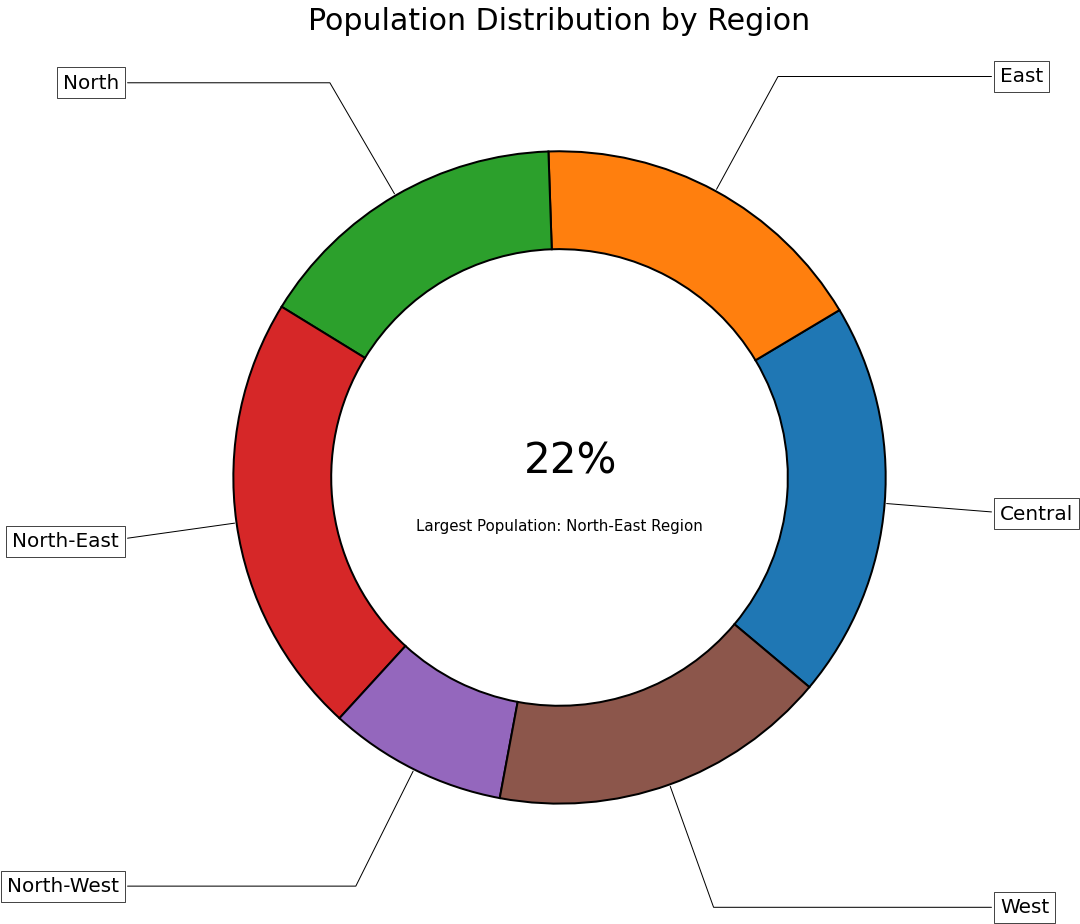

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import numpy as np
import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


raw_data = np.genfromtxt('./Datasets/(4) Estimated Singapore Resident Population in HDB Flats/estimated-resident-population-in-hdb-flats-by-town.csv',delimiter=',',names=True, dtype=[('financial_year','i8'),('town_or_estate','U25'),('population','i8'),('region','U20')])


financial_year = []
region = []
population = []


for row in raw_data:
    financial_year.append(row[0])
    region.append(row[3])
    population.append(row[2])


cleaned_data ={
    'year':np.array(financial_year),
    'region':np.array(region),
    'population': np.array(population)
}


unique_label = np.unique(cleaned_data['region'])
town_dict_1 = dict.fromkeys(unique_label, '')
temp_value = []
for key,value in town_dict_1.items():
    for i in range(len(population)):
        if region[i] == key:
            temp_value.append(population[i])
    town_dict_1[key] = sum(temp_value)
    temp_value = []

wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':2}


fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(town_dict_1.values(), wedgeprops=wedgeprops, startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(unique_label[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, fontsize=20,**kw)


ax.set_title("Population Distribution by Region",color='black',fontsize=30,pad=40)
plt.text(0.035, 0.05, "22%", ha='center', va='center', fontsize=42)
plt.text(0, -0.15, "Largest Population: North-East Region", ha='center',
         va='center', fontsize=15)

plt.show()


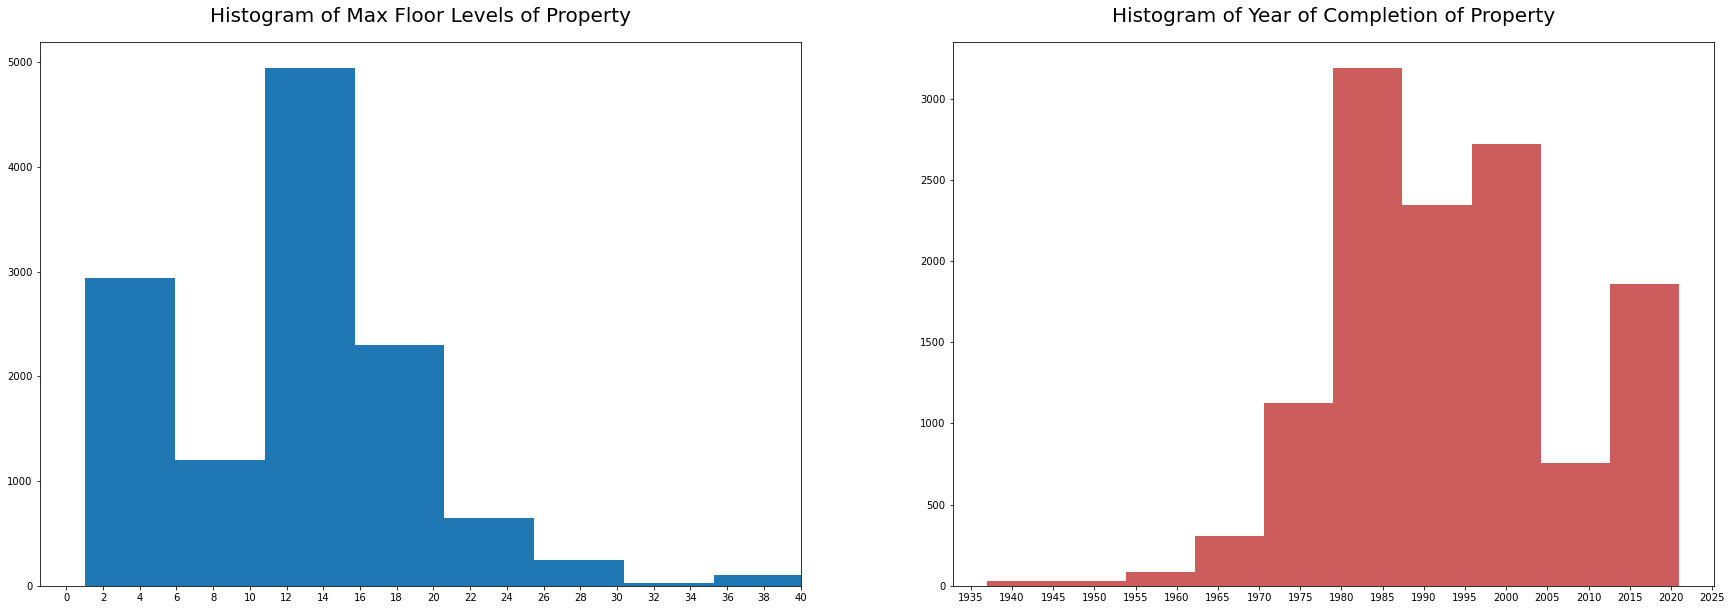

In [30]:
import matplotlib.pyplot as plt
from math import pi
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker
import matplotlib as mpl


raw_data = np.genfromtxt('./Datasets/(5) HDB Property Information/hdb-property-information.csv',delimiter=',',names=True, dtype=[('max_floor_lvl','i8'),('year_completed','i8'),('residential','?'),('commercial','?'),('market_hawker','?'),('multistorey_carpark','?'),('bldg_contract_town','U20'),('total_dwelling_units','i8'),('one_room_sold','i8'),('two_room_sold','i8'),('three_room_sold','i8'),('four_room_sold','i8'),('five_room_sold','i8')])


max_floor_lvl = []
year_completed = []
residential = []
commercial = []
market_hawker = []
multistorey_carpark = []
bldg_contract_town = []
total_dwelling_units = []
one_room_sold = []
two_room_sold = []
three_room_sold = []
four_room_sold = []
five_room_sold = []


for row in raw_data:
    max_floor_lvl.append(row[0])
    year_completed.append(row[1])
    residential.append(row[2])
    commercial.append(row[3])
    market_hawker.append(row[4])
    multistorey_carpark.append(row[5])
    bldg_contract_town.append(row[6])
    total_dwelling_units.append(row[7])
    one_room_sold.append(row[8])
    two_room_sold.append(row[9])
    three_room_sold.append(row[10])
    four_room_sold.append(row[11])
    five_room_sold.append(row[12])


cleaned_data ={
    'max_floor_lvl':np.array(max_floor_lvl),
    'year_completed':np.array(year_completed),
    'residential':np.array(residential),
    'commercial':np.array(commercial),
    'market_hawker':np.array(market_hawker),
    'multistorey_carpark':np.array(multistorey_carpark),
    'bldg_contract_town':np.array(bldg_contract_town),
    'total_dwelling_units':np.array(total_dwelling_units),
    'one_room_sold':np.array(one_room_sold),
    'two_room_sold':np.array(two_room_sold),
    'three_room_sold':np.array(three_room_sold),
    'four_room_sold':np.array(four_room_sold),
    'five_room_sold':np.array(five_room_sold)
}

labels = ['2 Rooms','3 Rooms','4 Rooms','5 Rooms']

fig,ax = plt.subplots(1,2,figsize=[30,10])
ax[0].hist(max_floor_lvl)
ax[0].set_xlim(right=40)
ax[0].set_title('Histogram of Max Floor Levels of Property',fontsize=20,pad=20)
ax[1].hist(year_completed,color='indianred')
ax[1].set_title('Histogram of Year of Completion of Property',fontsize=20,pad=20)
loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
ax[0].xaxis.set_major_locator(loc)
loc = plticker.MultipleLocator(base=5) # this locator puts ticks at regular intervals
ax[1].xaxis.set_major_locator(loc)

plt.show()


